# イメージを読み込む (os.listdir  vs  glob.glob)

https://stackoverflow.com/questions/13643558/should-glob-glob-be-preferred-over-os-listdir-or-the-other-way-around

In [1]:
!pip install tensorflow==1.15.0

In [2]:
import numpy  as np
import os
import glob 
import re

import matplotlib.pyplot as plt

from PIL import Image

%matplotlib inline

## osを使用する場合

In [3]:
path = './training' # 自分でフォルダを作成して、この中にデータを入れる。
flist = os.listdir(path)

In [4]:
!ls -a ./training

.                 cat_img3.jpg      dog_img2.jpg      dog_img6.jpg
..                cat_img4.jpg      dog_img3.jpg      dog_img_shiba.jpg
cat_img.jpg       cat_img5.jpg      dog_img4.jpg
cat_img2.jpg      cat_img6.jpg      dog_img5.jpg


In [5]:
flist

['cat_img.jpg',
 'cat_img2.jpg',
 'cat_img3.jpg',
 'cat_img4.jpg',
 'cat_img5.jpg',
 'cat_img6.jpg',
 'dog_img2.jpg',
 'dog_img3.jpg',
 'dog_img4.jpg',
 'dog_img5.jpg',
 'dog_img6.jpg',
 'dog_img_shiba.jpg']

In [6]:
# 不可視ファイルの.DS_Storeファイルを除いて読み込む

'''
余談

.DS_Storeファイルとは？ 開けるの？

https://miloserdov.org/?p=3867

'''


flist_ignore = [name for name in os.listdir(path) if not name.startswith('.')]
flist_ignore

['cat_img.jpg',
 'cat_img2.jpg',
 'cat_img3.jpg',
 'cat_img4.jpg',
 'cat_img5.jpg',
 'cat_img6.jpg',
 'dog_img2.jpg',
 'dog_img3.jpg',
 'dog_img4.jpg',
 'dog_img5.jpg',
 'dog_img6.jpg',
 'dog_img_shiba.jpg']

## globを使用する場合

In [7]:
img_list = glob.glob(path + '/*' + ".jpg")

In [8]:
img_list 

['./training/cat_img.jpg',
 './training/cat_img2.jpg',
 './training/cat_img3.jpg',
 './training/cat_img4.jpg',
 './training/cat_img5.jpg',
 './training/cat_img6.jpg',
 './training/dog_img2.jpg',
 './training/dog_img3.jpg',
 './training/dog_img4.jpg',
 './training/dog_img5.jpg',
 './training/dog_img6.jpg',
 './training/dog_img_shiba.jpg']

# イメージのロード、配列化、リサイズ、データセット作成

In [9]:
# np.resizeはだめ、ぜったい

dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:
    
    # ファイル名に'dog'が含まれるイメージを順番にロードしてる
    if re.search('dog', img):
        
        dog_img_ = Image.open(img)
        
        # サイズを揃える
        dog_img_ = dog_img_.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img_)
        
        # 正規化
        dog_img = dog_img / 255.
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img_ = Image.open(img)
        
        cat_img_ = cat_img_.resize((224, 224))
        
        cat_img = np.array(cat_img_)
        
        cat_img = cat_img / 255.
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)
        
    X = np.concatenate([dog_img_array, cat_img_array], axis=0)

dog_label = np.zeros(6)
cat_label = np.ones(6)
t = np.concatenate([dog_label, cat_label], axis=0)


In [10]:
print('dog_image:{}  cat_image:{}'.format(dog_img_array.shape, cat_img_array.shape))

dog_image:(6, 224, 224, 3)  cat_image:(6, 224, 224, 3)


# イメージの出力

In [11]:
# 配列のまま出力

print('データ型:', cat_img_array[3].dtype)

cat_img_array[3]

データ型: float64


array([[[0.91764706, 0.90980392, 0.82745098],
        [0.91764706, 0.90980392, 0.82745098],
        [0.91764706, 0.90980392, 0.82745098],
        ...,
        [0.82352941, 0.80392157, 0.69019608],
        [0.81960784, 0.8       , 0.68627451],
        [0.81960784, 0.8       , 0.68627451]],

       [[0.91764706, 0.90980392, 0.82745098],
        [0.91764706, 0.90980392, 0.82745098],
        [0.91764706, 0.90980392, 0.82745098],
        ...,
        [0.82352941, 0.80392157, 0.69019608],
        [0.81960784, 0.8       , 0.68627451],
        [0.81960784, 0.8       , 0.68627451]],

       [[0.91764706, 0.90980392, 0.82745098],
        [0.91764706, 0.90980392, 0.82745098],
        [0.91764706, 0.90980392, 0.82745098],
        ...,
        [0.82352941, 0.80392157, 0.69019608],
        [0.81960784, 0.8       , 0.68627451],
        [0.81960784, 0.8       , 0.68627451]],

       ...,

       [[0.5254902 , 0.49411765, 0.41176471],
        [0.51372549, 0.48235294, 0.4       ],
        [0.49019608, 0

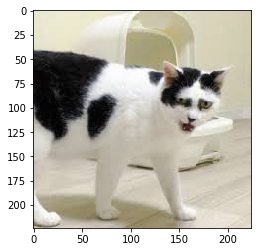

In [12]:
# 配列を画像として出力

plt.imshow(cat_img_array[3])

plt.show()

In [13]:
'''

画像の中心を切り出し

https://note.nkmk.me/python-pillow-image-crop-trimming/

'''


def crop_center(pil_img, crop_width, crop_height):
    
    img_width, img_height = pil_img.size
    
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))


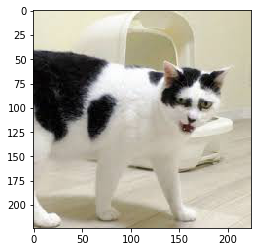

In [14]:
img = Image.open(img_list[3])

img_new = crop_center(img, 224, 224)

plt.imshow(img_new)

plt.show()

<class 'PIL.Image.Image'>


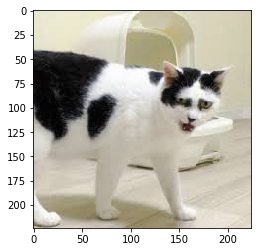

In [15]:
img = Image.open(img_list[3])

img_resize = img.resize((224,224))

print(type(img_resize))

plt.imshow(img_resize)

plt.show()

## Kerasでもやってみよう

In [16]:
from keras.preprocessing.image import load_img, img_to_array

/Users/tominagashuuji/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [17]:
img_keras = load_img(img_list[3], grayscale=False, color_mode='rgb', target_size=(224,224))

img_keras_array = img_to_array(img_keras) / 255.

print('データ型:', img_keras_array.dtype)

img_keras_array

データ型: float32


array([[[0.91764706, 0.9098039 , 0.827451  ],
        [0.91764706, 0.9098039 , 0.827451  ],
        [0.91764706, 0.9098039 , 0.827451  ],
        ...,
        [0.8235294 , 0.8039216 , 0.6901961 ],
        [0.81960785, 0.8       , 0.6862745 ],
        [0.81960785, 0.8       , 0.6862745 ]],

       [[0.91764706, 0.9098039 , 0.827451  ],
        [0.91764706, 0.9098039 , 0.827451  ],
        [0.91764706, 0.9098039 , 0.827451  ],
        ...,
        [0.8235294 , 0.8039216 , 0.6901961 ],
        [0.81960785, 0.8       , 0.6862745 ],
        [0.81960785, 0.8       , 0.6862745 ]],

       [[0.91764706, 0.9098039 , 0.827451  ],
        [0.91764706, 0.9098039 , 0.827451  ],
        [0.91764706, 0.9098039 , 0.827451  ],
        ...,
        [0.8235294 , 0.8039216 , 0.6901961 ],
        [0.81960785, 0.8       , 0.6862745 ],
        [0.81960785, 0.8       , 0.6862745 ]],

       ...,

       [[0.5254902 , 0.49411765, 0.4117647 ],
        [0.5137255 , 0.48235294, 0.4       ],
        [0.49019608, 0

<class 'PIL.Image.Image'>


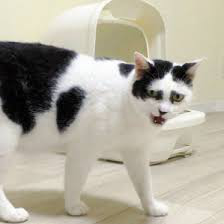

In [18]:
print(type(img_keras))

img_keras

# openCVの色形式

In [19]:
import cv2

## グレースケール 

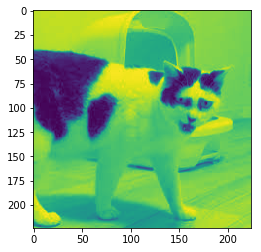

In [20]:
# 第二引数を0にするとグレースケールで読み込める
img = cv2.imread(img_list[3], 0)

# cv2でリサイズ
img = cv2.resize(img, (224, 224))

plt.imshow(img)

plt.show()

## BGRとRGB

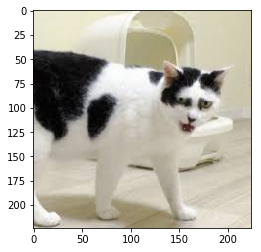

In [21]:
'''

なぜ彼らはOpenCVでBGRカラースペースを選択したのですか？

OpenCVの初期の開発者がBGRカラー形式を選択した理由は、
当時のBGRカラー形式がカメラメーカーとソフトウェアプロバイダーの間で人気があったためです。
たとえば、Windowsでは、COLORREFを使用して色の値を指定する場合、BGR形式0x00bbggrrを使用します。

BGRは歴史的な理由から選択されたものであり、今ではBGRと共存しなければなりません。
言い換えれば、BGRはOpenCVの馬のお尻です。

https://www.learnopencv.com/why-does-opencv-use-bgr-color-format/

'''


img = cv2.imread(img_list[3])
img = cv2.resize(img, (224, 224))

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# RGBチャネル

plt.imshow(img_rgb)

plt.show()

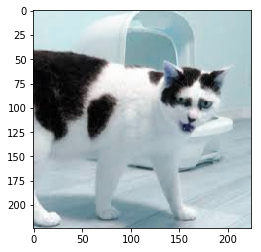

In [22]:
# BGRチャネル

plt.imshow(img)

plt.show()

In [23]:
# 使用ライブラリーの読み込み
import numpy as np
import glob
import os
import re

from PIL import Image
import cv2

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras import backend as K

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from albumentations import (
    HorizontalFlip, ShiftScaleRotate,RandomRotate90, Blur,Compose,  RGBShift, VerticalFlip, BboxParams,)

from xml.etree import ElementTree

%matplotlib inline

## 【問題1】自作データセットでの分類の学習
自作のデータセットに対して分類問題を解いてください。任意の実装を使用してください。

In [24]:
K.clear_session()
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200, activation="relu"))
model.add(Dense(1, activation="softmax"))
model.compile( loss="binary_crossentropy",
    optimizer=Adam(lr=0.01),
    metrics=["accuracy"])
model.summary()

history = model.fit(X, t, epochs=10,verbose=1)

W0320 15:13:07.126824 140735937377216 module_wrapper.py:139] From /Users/tominagashuuji/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:107: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0320 15:13:07.129149 140735937377216 module_wrapper.py:139] From /Users/tominagashuuji/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:111: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0320 15:13:07.137785 140735937377216 module_wrapper.py:139] From /Users/tominagashuuji/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0320 15:13:07.139459 140735937377216 module_wrapper.py:139] From /Users/tominagashuuji/.pyenv/versions/anaconda3-5.1.0/lib/p

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 394272)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               78854600  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 78,855,697
Trainable params: 78,855,697
Non-trainable params: 0
_________________________________________________________________


W0320 15:13:07.469439 140735937377216 module_wrapper.py:139] From /Users/tominagashuuji/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1020: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.

W0320 15:13:07.542659 140735937377216 module_wrapper.py:139] From /Users/tominagashuuji/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3005: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0320 15:13:07.558624 140735937377216 module_wrapper.py:139] From /Users/tominagashuuji/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:190: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0320 15:13:07.559408 140735937377216 module_wrapper.py:139] From /Users/tominagashuuji/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/keras/backend/tensorflow_backe

Epoch 1/10
12/12 [==============================] - 7s 616ms/step - loss: 7.9712 - acc: 0.5000
Epoch 2/10
12/12 [==============================] - 3s 210ms/step - loss: 7.9712 - acc: 0.5000
Epoch 3/10
12/12 [==============================] - 2s 137ms/step - loss: 7.9712 - acc: 0.5000
Epoch 4/10
12/12 [==============================] - 1s 115ms/step - loss: 7.9712 - acc: 0.5000
Epoch 5/10
12/12 [==============================] - 1s 123ms/step - loss: 7.9712 - acc: 0.5000
Epoch 6/10
12/12 [==============================] - 1s 119ms/step - loss: 7.9712 - acc: 0.5000
Epoch 7/10
12/12 [==============================] - 1s 115ms/step - loss: 7.9712 - acc: 0.5000
Epoch 8/10
12/12 [==============================] - 1s 121ms/step - loss: 7.9712 - acc: 0.5000
Epoch 9/10
12/12 [==============================] - 2s 127ms/step - loss: 7.9712 - acc: 0.5000
Epoch 10/10
12/12 [==============================] - 1s 101ms/step - loss: 7.9712 - acc: 0.5000


## 【問題2】分類データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。

In [25]:
def data_aug(img_list):
    """
    データの拡張を行う関数
    データのパスを受け取り、変化させた画像をnp.arrayの形で返す
    """
    result_array = np.empty((0, 224,224,3))
    
    hori = HorizontalFlip(p=1)
    blur = Blur()
    shift = RGBShift()
    rota = ShiftScaleRotate()    
    
    for img in img_list:
        image = cv2.imread(img)
        image = cv2.resize(image, (224,224))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        image_original = (image / 225.0).reshape(1, 224 ,224 , 3)
        image_hori = (hori(image=image)["image"] / 225.0).reshape(1, 224, 224, 3)
        image_blur = (blur(image=image)["image"] / 225.0).reshape(1, 224, 224, 3)
        image_shift = (shift(image=image)["image"] / 225.0).reshape(1, 224, 224, 3)
        image_rota = (rota(image=image)["image"] / 225.0).reshape(1, 224, 224, 3)
        
        result_array = np.concatenate([result_array, image_original, image_hori, image_blur, image_shift, image_rota], axis=0)
        
    return result_array

In [26]:
X_aug = data_aug(img_list)
X_aug.shape

(60, 224, 224, 3)

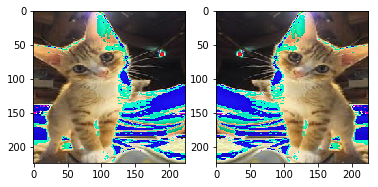

In [27]:
#確認
plt.subplot(1, 2, 1)
plt.imshow(X_aug[0])

plt.subplot(1, 2, 2)
plt.imshow(X_aug[1])

plt.show()

## 【問題3】物体検出データセットの用意¶
次に、物体検出を行います。バウンディングボックスのアノテーションを行い物体検出のためのデータセットを作成してください。

LabelImgを用いてアノテーションを行なった。  

## 【問題4】物体検出データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。前述のalbumentationsはバウンディングボックスを合わせての加工が可能です。詳細はREADME.mdを確認してください。

物体検出の学習を行なうかどうかは任意とします。

In [83]:
def get_ann_array(ann_list):
    """
    xmlからbboxのxmin, ymin, xmax, ymaxを取得する
    """
    cord_bbox = np.empty((0, 4))
    for ann in ann_list:
        tree = ElementTree.parse(ann)
        root = tree.getroot()
        data = root.find('object').find("bndbox")
        
        xmin = int(data.find("xmin").text)
        ymin = int(data.find("ymin").text)
        xmax = int(data.find("xmax").text)
        ymax = int(data.find("ymax").text)
        
        bbox_array = np.array([xmin, ymin, xmax, ymax]).reshape(1, 4)
        cord_bbox = np.concatenate([cord_bbox, bbox_array], axis=0)
    return cord_bbox

In [84]:
def img2array(img_list):
    """
    パスから画像のarrayを取得
    """
    array = np.empty((0, 224,224, 3))
    for img in img_list:
        image = cv2.imread(img)
        image = cv2.resize(image, (224,224))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = image.reshape(1, 224,224,3)
        
        array = np.concatenate([array, image], axis=0)
    return array

In [85]:
def get_aug(aug, min_area=0., min_visibility=0.):
    return Compose(aug, bbox_params=BboxParams(format='pascal_voc', min_area=min_area, 
                                               min_visibility=min_visibility, label_fields=['category_id']))

In [86]:
def aug_object(image_data, ann_data):
    """
    画像データとbboxesの水増しを行う
    ---------------------------------------------
    input
    image_data: np.ndarray
    ann_data:np.ndarray
    ---------------------------------------------
    output
    result_data_array:np.ndarray
    result_ann_array:np.ndarray
    
    """
    #結果を入れる箱を用意
    result_data_array = np.empty((0, 224,224,3))
    result_ann_array = np.zeros((0, 4))
    


    for i in range(image_data.shape[0]):
        #変化させるクラスをインスタンス化
        hori = get_aug([HorizontalFlip(p=1)])
        var = get_aug([VerticalFlip(p=1)])
        shift= get_aug([RandomRotate90(p=1)])
        fli = get_aug([Blur(p=1)])
        
        #上から５つが猫なので、分類する
        if i <= 6:
            annotations = {'image':image_data[i] , 'bboxes': [ann_data[i]], 'category_id': [1]}
        else:
             annotations = {'image':image_data[i] , 'bboxes': [ann_data[i]], 'category_id': [0]}
            
        #それぞれ変化させる
        image_hori = hori(**annotations)
        image_var = var(**annotations)
        image_shift = shift(**annotations)
        image_fli = fli(**annotations)
        
        #変化させた画像をnp.arrayの形で取り出し、結果を入れる箱に合うようにrehape
        im = image_data[i].reshape(1, 224, 224, 3)
        im_hori = image_hori["image"].reshape(1, 224, 224, 3)
        im_var = image_var["image"].reshape(1, 224, 224, 3)
        im_shift = image_shift["image"].reshape(1, 224, 224, 3)
        im_fli = image_fli["image"].reshape(1, 224, 224, 3)
        
        #変化させたbboxを取り出し、結果を入れる箱に合うようにreshape
        an = ann_data[i].reshape(1, 4)
        an_hori = np.array(image_hori["bboxes"]).reshape(1, 4)
        an_var = np.array(image_var["bboxes"]).reshape(1, 4)
        an_shift = np.array(image_shift["bboxes"]).reshape(1, 4)
        an_fli = np.array(image_fli["bboxes"]).reshape(1, 4)
        
        result_data_array = np.concatenate([result_data_array, im, im_hori, im_var, im_shift, im_fli], axis=0)
        result_ann_array = np.concatenate([result_ann_array, an, an_hori, an_var, an_shift, an_fli], axis=0)
        
    
    return result_data_array, result_ann_array

In [87]:
def im_show(img_data, ann_data, num):
    """
    画像データにbboxを表示したものを返す
    """
    x_min, y_min, x_max, y_max = aug_ann[num].reshape(4,)
    show_img_box = cv2.rectangle(aug_img[num].astype(np.uint8), (int(x_min), int(y_min)), (int(x_max), int(y_max)), color=(255,0,0), thickness = 2)
    return show_img_box

In [88]:
#アノテーションしたファイルのパス取得
p = "./training"
ann_list = glob.glob(p  + '/*' + ".xml")
ann_list

['./training/cat_img.xml',
 './training/cat_img2.xml',
 './training/cat_img3.xml',
 './training/cat_img4.xml',
 './training/cat_img5.xml',
 './training/cat_img6.xml',
 './training/dog_img2.xml',
 './training/dog_img3.xml',
 './training/dog_img4.xml',
 './training/dog_img5.xml',
 './training/dog_img6.xml',
 './training/dog_img_shiba.xml']

In [95]:
#アノテーションした後のxmlからbboxの座標を取得
cord_bbox = get_ann_array(ann_list)
cord_bbox

array([[  1.,   4., 125., 200.],
       [ 93.,  21., 199., 174.],
       [ 24.,  26., 159., 138.],
       [  1.,  38., 200., 200.],
       [ 16.,   2., 200., 156.],
       [ 83.,   1., 200., 155.],
       [ 62.,  11., 200., 175.],
       [ 65.,   6., 200., 194.],
       [ 79.,  20., 209., 150.],
       [ 92.,   8., 201., 137.],
       [ 31.,  44., 160., 130.],
       [ 12.,  22., 117., 180.]])

In [96]:
#リストから画像のarrayを取得
#255で割っていない
X_data = img2array(img_list)

In [97]:
#データの水増し
aug_img, aug_ann = aug_object(X_data, cord_bbox)

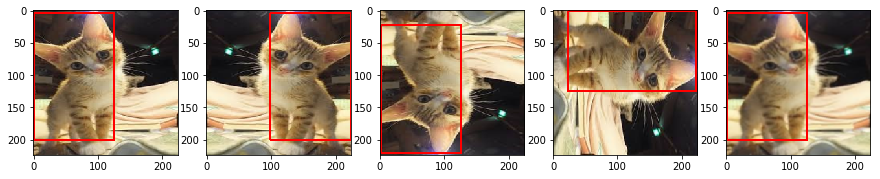

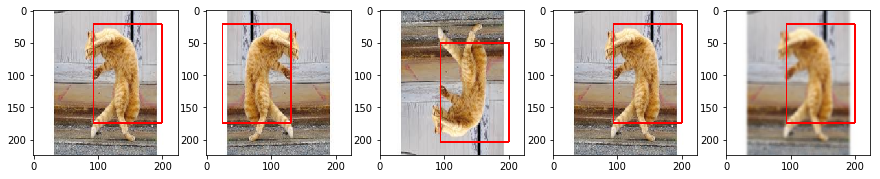

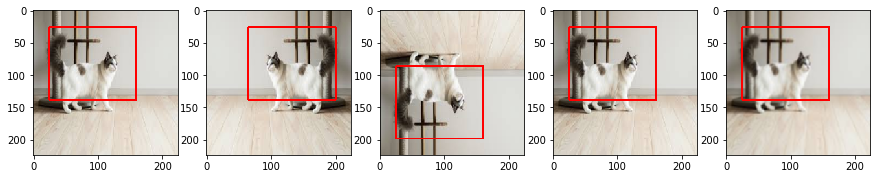

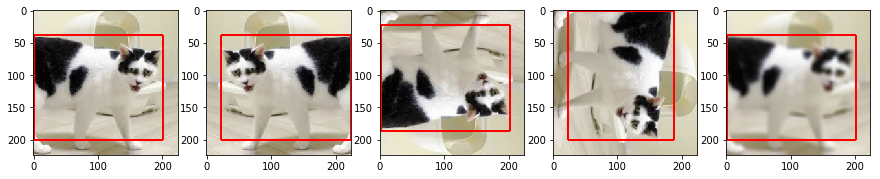

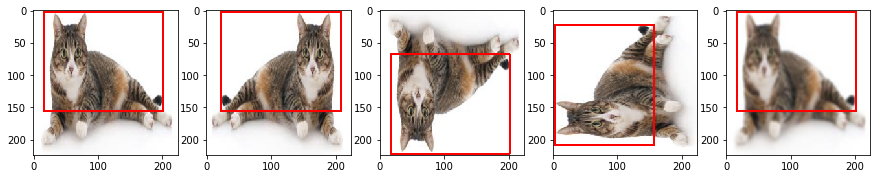

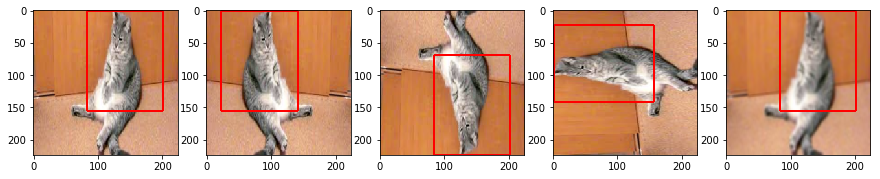

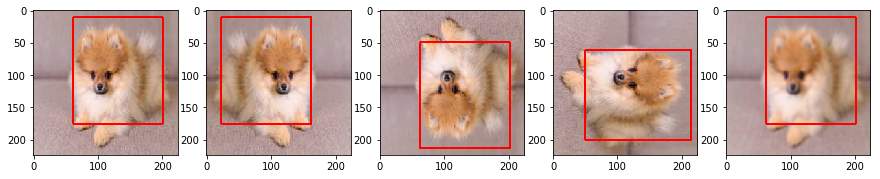

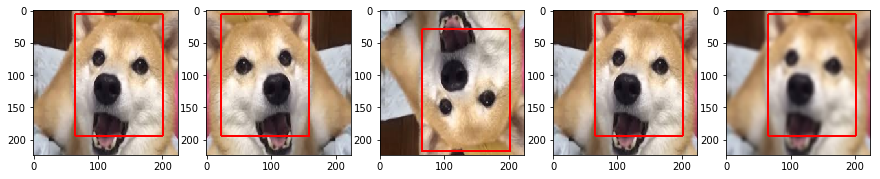

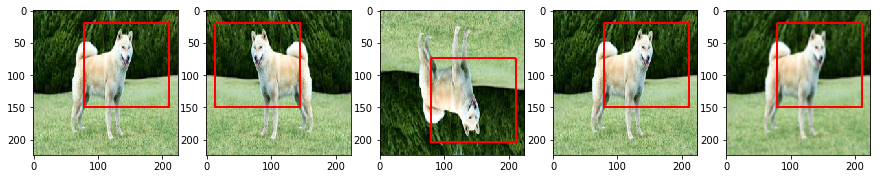

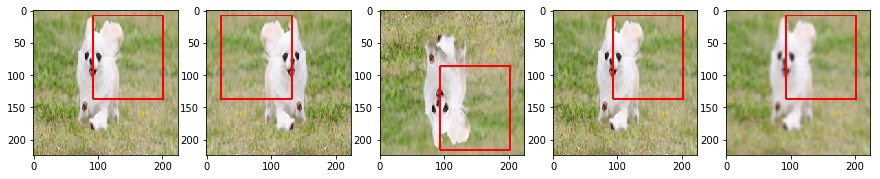

In [98]:
#確認
j = 0
for i in range(10):
    plt.figure(figsize=(15, 10))
    image = im_show(aug_img, aug_ann, i+j)
    plt.subplot(1, 5, 1)
    plt.imshow(image)
    
    image = im_show(aug_img, aug_ann, i+1+j)
    plt.subplot(1, 5, 2)
    plt.imshow(image)
    
    image = im_show(aug_img, aug_ann, i+2+j)
    plt.subplot(1, 5, 3)
    plt.imshow(image)
    
    image = im_show(aug_img, aug_ann, i+3+j)
    plt.subplot(1, 5, 4)
    plt.imshow(image)
    
    image = im_show(aug_img, aug_ann, i+4+j)
    plt.subplot(1, 5, 5)
    plt.imshow(image)
    
    j += 4
    
    plt.show()